##    Zillow Pricing Model <br> <font size='3'> "Flat Monthly Charge per Community" vs. "Charge Per Lead Received"</font> <br> <font size='2'> Reza Taeb - Data Scientist Candidate - Zillow Offers <br>  Zillow Group </font> 

The Zillow Group Pricing Analytics team wants to decide between two possible models that Zillow’s New Construction sales team can charge their customers: "Monthly Charge per Community" or "Flat Price per Lead Received".<br>
In this piece, these two models will be compared together in terms of long-term revenue. 

In [1]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt


### A - Number of Communities in each Model </br> 
In this part, the Community dataframe is formed in order to observe trend of "Number of Advertisied Communities" in each model. We do know the intial number of communities (in January 2016), and month to month growth rates for each model. 

In [2]:
## Creating "Community" dataframe for both models 

# Initiate Empty Pandas DataFrame
df_community = pd.DataFrame( columns = ['Time','GR_Community_PerLead_Model','GR_Community_PerCommu_Model','Num_Community_PerLead_Model','Num_Community_PerCommu_Model'])



# Assign "Time Period (Jan2016 - Dec2018)" to Time
Date = pd.date_range('01/01/2016','01/01/2019', freq='M')
df_community['Time'] = Date


# Assign "Monthly Growth Rate" in each model
GR_Commu = [1.06,1.04,1.02]
month = 12

## A - "Growth Rate in Per Lead Model"
GR_Community_PerLead_Model = [item for item in GR_Commu for i in range(month)]

## B - "Growth Rate in Per Community Model"
Cancellation_Rate = 0.1
GR_Community_PerCommu_Model = [((item-1)*(1-Cancellation_Rate))+1 for item in GR_Community_PerLead_Model]

### Assign Growth Rate Columns to DataFrame
df_community['GR_Community_PerLead_Model'] =GR_Community_PerLead_Model
df_community['GR_Community_PerCommu_Model'] =GR_Community_PerCommu_Model

# Calculate "Number of New Communities Advertised" in each model 
initial_num_community = 6174
df_community.loc[0,'Num_Community_PerLead_Model'] =  df_community.loc[0,'GR_Community_PerLead_Model'] * initial_num_community
df_community.loc[0,'Num_Community_PerCommu_Model'] = df_community.loc[0,'GR_Community_PerCommu_Model'] * initial_num_community

for i in range(1, len(df_community)):
    df_community.loc[i, 'Num_Community_PerLead_Model'] = df_community.loc[i-1, 'Num_Community_PerLead_Model'] * df_community.loc[i, 'GR_Community_PerLead_Model'] 

for i in range(1, len(df_community)):
    df_community.loc[i, 'Num_Community_PerCommu_Model'] = df_community.loc[i-1, 'Num_Community_PerCommu_Model'] * df_community.loc[i, 'GR_Community_PerCommu_Model']     
    

df_community

,Time,GR_Community_PerLead_Model,GR_Community_PerCommu_Model,Num_Community_PerLead_Model,Num_Community_PerCommu_Model
0,2016-01-31,1.06,1.054,6544.44,6507.4
1,2016-02-29,1.06,1.054,6937.11,6858.8
2,2016-03-31,1.06,1.054,7353.33,7229.17
3,2016-04-30,1.06,1.054,7794.53,7619.55
4,2016-05-31,1.06,1.054,8262.2,8031
5,2016-06-30,1.06,1.054,8757.94,8464.68
6,2016-07-31,1.06,1.054,9283.41,8921.77
7,2016-08-31,1.06,1.054,9840.42,9403.54
8,2016-09-30,1.06,1.054,10430.8,9911.33
9,2016-10-31,1.06,1.054,11056.7,10446.5


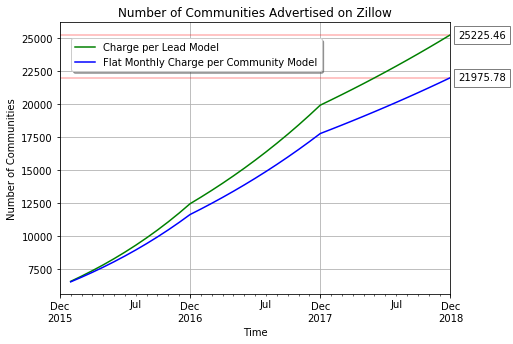

In [3]:
# Plot "Number of Advertised Communities" in 2 models

ax = df_community.plot(x='Time', y=['Num_Community_PerLead_Model', 'Num_Community_PerCommu_Model'], grid=True, color=['green','blue'] , figsize=(7,5))

plt.legend(["Charge per Lead Model","Flat Monthly Charge per Community Model"],loc='upper center', bbox_to_anchor=(0.35, 0.96), fancybox=True, shadow=True)
plt.title("Number of Communities Advertised on Zillow")
plt.ylabel("Number of Communities")
plt.xlabel("Time")

xmin, xmax = ax.get_xlim()
plt.xticks(np.arange(xmin-1,xmax+3,12),['Dec\n2015','Dec\n2016', 'Dec\n2017','Dec\n2018'])

# Ploting Horizontal Lines at December 2018 to show number of communities for each model on plot

num_community_PerLead_Model_dec2018 = df_community['Num_Community_PerLead_Model'].iloc[-1]
num_community_PerCommu_Model_dec2018 = df_community['Num_Community_PerCommu_Model'].iloc[-1]
ax.hlines(y=num_community_PerLead_Model_dec2018, xmin=xmin-1,xmax=xmax+3, alpha=0.3, color='red')
ax.hlines(y=num_community_PerCommu_Model_dec2018, xmin=xmin-1,xmax=xmax+3, alpha=0.3, color='red')

ax.text(1.02, num_community_PerLead_Model_dec2018, "%.2f" %num_community_PerLead_Model_dec2018, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_yaxis_transform())
ax.text(1.02, num_community_PerCommu_Model_dec2018, "%.2f" %num_community_PerCommu_Model_dec2018, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),transform=ax.get_yaxis_transform())

plt.show()


In [4]:
# Set "Time" column as Index    
#df_community=df_community.set_index('Time')

### B- Overal Revenue in each Model

In this part, the Revenue dataframe is formed. In each model "Monthly Income per Community" , "Monthly Total Income" , and "Cumulative Income" are calculted in order to compare two possible options. 

In [5]:
## Creating "Revenue" dataframe for both models 

# Initiate Empty Pandas DataFrame
df_revenue = pd.DataFrame( columns = ['Time','Num_Community_PerCommu_Model', 'Community_Charge_PerCommu_Model', 'Revenue_PerCommu_Model','Cumulative_Revenue_PerCommu_Model',
                                      'Num_Community_PerLead_Model', 'GR_Lead','Num_Lead_Per_Community','Lead_Fee','Community_Charge_PerLead_Model','Revenue_PerLead_Model','Cumulative_Revenue_PerLead_Model'])

# Bring similar columns from previous dataframe (df_community)
df_revenue['Time'] = Date
df_revenue['Num_Community_PerCommu_Model'] = df_community['Num_Community_PerCommu_Model']
df_revenue['Num_Community_PerLead_Model'] = df_community['Num_Community_PerLead_Model']

# Create columns for "Flat Monthly Charge per Community Model" 
df_revenue['Community_Charge_PerCommu_Model'] = 400
df_revenue['Revenue_PerCommu_Model'] = df_revenue['Num_Community_PerCommu_Model'] * df_revenue['Community_Charge_PerCommu_Model'] 
df_revenue.loc[0,'Cumulative_Revenue_PerCommu_Model'] = df_revenue.loc[0,'Revenue_PerCommu_Model']
for i in range(1, len(df_revenue)):
    df_revenue.loc[i, 'Cumulative_Revenue_PerCommu_Model'] = df_revenue.loc[i-1, 'Cumulative_Revenue_PerCommu_Model'] + df_revenue.loc[i,'Revenue_PerCommu_Model'] 


    
    
    
# Create columns for "Charge per Lead Received" Model
df_revenue['Num_Community_PerLead_Model'] = df_community['Num_Community_PerLead_Model']

# Lead Growth Rate in "Charge per lead" model 
GR_lead_rates = [1.05 , 1.04 , 1.01]
month = 12

GR_Lead = [item for item in GR_lead_rates for i in range(month)]

initial_num_lead = 4
lead_fee = 40

df_revenue['GR_Lead'] = GR_Lead
df_revenue.loc[0,'Num_Lead_Per_Community'] = df_revenue.loc[0,'GR_Lead'] * initial_num_lead

for i in range(1, len(df_revenue)):
    df_revenue.loc[i, 'Num_Lead_Per_Community'] = df_revenue.loc[i-1 , 'Num_Lead_Per_Community'] * df_revenue.loc[i,'GR_Lead']

df_revenue['Lead_Fee'] = lead_fee  

df_revenue['Community_Charge_PerLead_Model'] = df_revenue['Lead_Fee'] * df_revenue['Num_Lead_Per_Community']
df_revenue['Revenue_PerLead_Model'] = df_revenue['Num_Community_PerLead_Model'] * df_revenue['Community_Charge_PerLead_Model']


df_revenue.loc[0,'Cumulative_Revenue_PerLead_Model'] = df_revenue.loc[0,'Revenue_PerLead_Model']
for i in range(1, len(df_revenue)):
    df_revenue.loc[i, 'Cumulative_Revenue_PerLead_Model'] = df_revenue.loc[i-1, 'Cumulative_Revenue_PerLead_Model'] + df_revenue.loc[i,'Revenue_PerLead_Model'] 


    
    
df_revenue

,Time,Num_Community_PerCommu_Model,Community_Charge_PerCommu_Model,Revenue_PerCommu_Model,Cumulative_Revenue_PerCommu_Model,Num_Community_PerLead_Model,GR_Lead,Num_Lead_Per_Community,Lead_Fee,Community_Charge_PerLead_Model,Revenue_PerLead_Model,Cumulative_Revenue_PerLead_Model
0,2016-01-31,6507.4,400,2.60296e+06,2.60296e+06,6544.44,1.05,4.2,40,168,1.09947e+06,1.09947e+06
1,2016-02-29,6858.8,400,2.74352e+06,5.34648e+06,6937.11,1.05,4.41,40,176.4,1.22371e+06,2.32317e+06
2,2016-03-31,7229.17,400,2.89167e+06,8.23814e+06,7353.33,1.05,4.6305,40,185.22,1.36198e+06,3.68516e+06
3,2016-04-30,7619.55,400,3.04782e+06,1.1286e+07,7794.53,1.05,4.86203,40,194.481,1.51589e+06,5.20104e+06
4,2016-05-31,8031,400,3.2124e+06,1.44984e+07,8262.2,1.05,5.10513,40,204.205,1.68718e+06,6.88823e+06
5,2016-06-30,8464.68,400,3.38587e+06,1.78842e+07,8757.94,1.05,5.36038,40,214.415,1.87784e+06,8.76606e+06
6,2016-07-31,8921.77,400,3.56871e+06,2.14529e+07,9283.41,1.05,5.6284,40,225.136,2.09003e+06,1.08561e+07
7,2016-08-31,9403.54,400,3.76142e+06,2.52144e+07,9840.42,1.05,5.90982,40,236.393,2.3262e+06,1.31823e+07
8,2016-09-30,9911.33,400,3.96453e+06,2.91789e+07,10430.8,1.05,6.20531,40,248.213,2.58907e+06,1.57714e+07
9,2016-10-31,10446.5,400,4.17862e+06,3.33575e+07,11056.7,1.05,6.51558,40,260.623,2.88163e+06,1.8653e+07


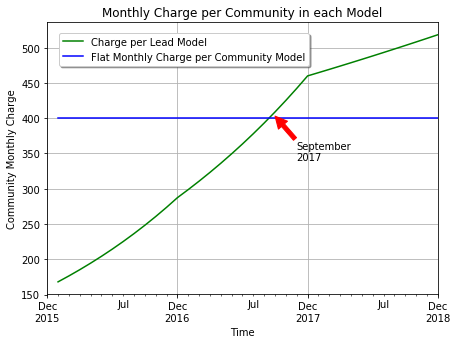

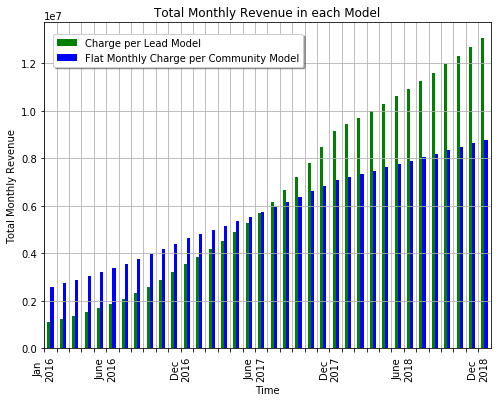

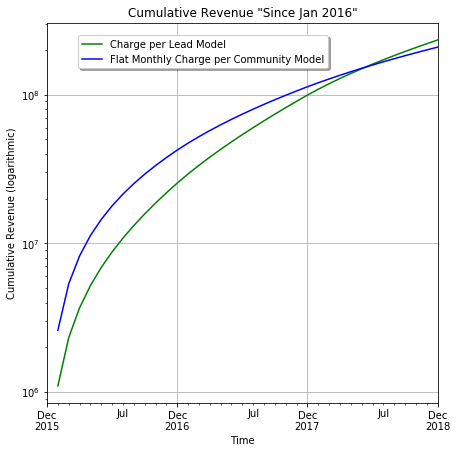

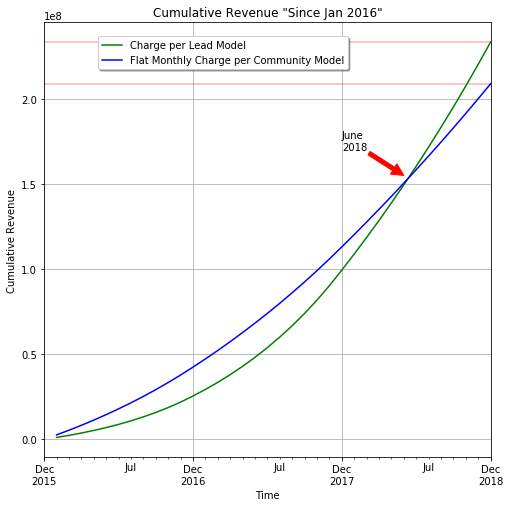

In [6]:
# Plot some useful charts from "Revenue" DataFrame 


# Plot "Monthly Charge per Community in each model" 
ax2 = df_revenue.plot(x='Time' , y=['Community_Charge_PerLead_Model','Community_Charge_PerCommu_Model'],grid=True, color=['green','blue'], figsize=(7,5))
plt.title('Monthly Charge per Community in each Model')
plt.legend(["Charge per Lead Model","Flat Monthly Charge per Community Model"],loc='upper center', bbox_to_anchor=(0.35, 0.98), fancybox=True, shadow=True)
plt.ylabel("Community Monthly Charge")
plt.xlabel("Time")


xmin, xmax = ax2.get_xlim()
plt.xticks(np.arange(xmin-1,xmax+3,12),['Dec\n2015','Dec\n2016', 'Dec\n2017','Dec\n2018'])

# Marking the intersection point of two charts 
plt.annotate('September\n2017', xy=('2017-09-30',403), xytext=('2017-11-30',340), arrowprops={'color':'red','lw':1.05})

plt.show()


# Plot "Monthly Total Revenue in each model" 
ax3 = df_revenue.plot(x='Time' , y=['Revenue_PerLead_Model','Revenue_PerCommu_Model'] , grid=True, color=['green','blue'], figsize=(8,6) , kind='bar', align='center')
plt.title('Total Monthly Revenue in each Model')
plt.legend(["Charge per Lead Model","Flat Monthly Charge per Community Model"],loc='upper center', bbox_to_anchor=(0.3, 0.98), fancybox=True, shadow=True)
plt.ylabel("Total Monthly Revenue")
plt.xlabel("Time")


xmin, xmax = ax3.get_xlim()
plt.xticks(np.arange(xmin,xmax),['Jan\n2016','','','','','June\n2016','','','','','','Dec\n2016','','','','','','June\n2017','','','','','','Dec\n2017','','','','','','June\n2018','','','','','','Dec\n2018'])

plt.show()


# Plot "Cumulative Revenue in each Model"

ax4 = df_revenue.plot(x='Time' , y=['Cumulative_Revenue_PerLead_Model','Cumulative_Revenue_PerCommu_Model'] , grid=True, color=['green','blue'], figsize=(7,7) )
plt.title('Cumulative Revenue "Since Jan 2016"')
plt.legend(["Charge per Lead Model","Flat Monthly Charge per Community Model"],loc='upper center', bbox_to_anchor=(0.4, 0.98), fancybox=True, shadow=True)
plt.ylabel("Cumulative Revenue (logarithmic)")
plt.xlabel("Time")
plt.yscale('log')

xmin, xmax = ax4.get_xlim()
plt.xticks(np.arange(xmin-1,xmax+3,12),['Dec\n2015','Dec\n2016', 'Dec\n2017','Dec\n2018'])


plt.show()


ax5 = df_revenue.plot(x='Time' , y=['Cumulative_Revenue_PerLead_Model','Cumulative_Revenue_PerCommu_Model'] , grid=True, color=['green','blue'], figsize=(8,8) )
plt.title('Cumulative Revenue "Since Jan 2016"')
plt.legend(["Charge per Lead Model","Flat Monthly Charge per Community Model"],loc='upper center', bbox_to_anchor=(0.4, 0.98), fancybox=True, shadow=True)
plt.ylabel("Cumulative Revenue")
plt.xlabel("Time")


xmin, xmax = ax5.get_xlim()
plt.xticks(np.arange(xmin-1,xmax+3,12),['Dec\n2015','Dec\n2016', 'Dec\n2017','Dec\n2018'])

plt.annotate('June\n2018', xy=('2018-05-30',1.55e8), xytext=('2017-12-30',1.7e8), arrowprops={'color':'red','lw':1.05})

# Ploting Horizontal Lines at December 2018 to show number of communities for each model on plot

cumulative_revenue_PerLead_Model_dec2018 = df_revenue['Cumulative_Revenue_PerLead_Model'].iloc[-1]
cumulative_revenue_PerCommu_Model_dec2018 = df_revenue['Cumulative_Revenue_PerCommu_Model'].iloc[-1]
ax5.hlines(y=cumulative_revenue_PerLead_Model_dec2018, xmin=xmin-1,xmax=xmax+3, alpha=0.3, color='red')
ax5.hlines(y=cumulative_revenue_PerCommu_Model_dec2018, xmin=xmin-1,xmax=xmax+3, alpha=0.3, color='red')


plt.show()
